<a href="https://colab.research.google.com/github/andrehochuli/teaching/blob/main/Extens%C3%A3o-DS/02%20-%20Naive%20Bayes/T%C3%B3pico%2003%20-%20Aprendizado%20Supervisionado_Naive-Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tutorial Naive Bayes

Neste tutorial, vamos explorar o algoritmo Naive Bayes utilizando a biblioteca scikit-learn. O Naive Bayes é um método probabilístico de classificação que assume independência condicional entre os atributos.

O funcionamento do algoritmo se baseia na aplicação do Teorema de Bayes para calcular a probabilidade condicional de uma amostra pertencer a determinada classe, dadas as suas características.

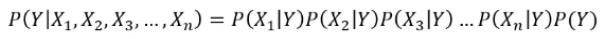

#Dataset Sintético

[-0.20540062 -0.2924709  -0.01224944  1.26808829 -1.09610937  0.95538172
 -0.70614327  0.85933329 -0.42366983 -1.78977433 -0.12972852  0.43469529
  0.75720152 -0.07712282 -0.42885796 -0.63364627 -1.09738006 -0.46474658
  0.16047056 -0.67235806] 1


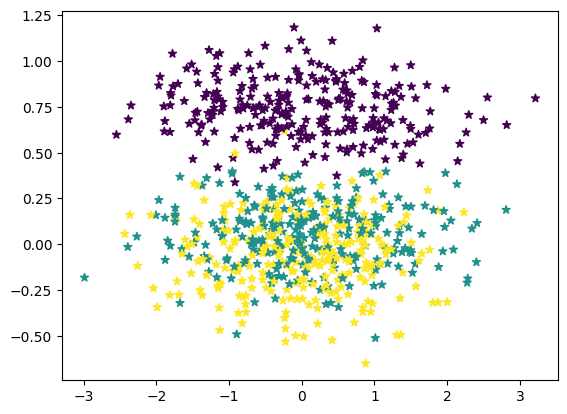

In [29]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
'from sklearn.datasets import make_moons'

#Seed (Garante a reproducibilidade)
random_state = 5000

X, y = make_classification(
    n_features=20,
    n_classes=3,
    n_samples=800,
    n_informative=2,
    n_clusters_per_class=1,
    random_state=random_state,
)

pca = PCA(n_components=2)
X_ = pca.fit_transform(X)
print(X[0],y[0])
plt.scatter(X[:, 1], X[:, 2], c=y, marker="*");
plt.show()

##Holdout
Ao separar o conjunto de dados em conjuntos de treinamento e teste, podemos treinar o modelo no conjunto de treinamento e avaliar sua capacidade de generalização no conjunto de teste. Se o modelo tiver um desempenho semelhante em ambos os conjuntos, isso indica que o modelo é capaz de generalizar e fazer previsões em novos dados. Caso contrário, se o desempenho do modelo no conjunto de teste for significativamente pior do que no conjunto de treinamento, pode ser um sinal de que o modelo está sobreajustando (overfitting) aos dados de treinamento e não consegue generalizar adequadamente.

Veremos essa análise nas células seguintes. Uma análise mais profunda, é mérito de discussão nas próximas aulas.

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=random_state
)



##Treinando o Modelo

Durante o treinamento do Naive Bayes, são calculadas as probabilidades condicionais de cada atributo dado cada classe. Essas probabilidades são usadas posteriormente para calcular a probabilidade a posteriori de cada classe para um conjunto de atributos dado.

O modelo Naive Bayes assume que todos os atributos são independentes entre si, o que significa que a probabilidade de que ocorra um conjunto de atributos pode ser calculada multiplicando as probabilidades condicionais individuais de cada atributo.

Resumindo, durante o treinamento do Naive Bayes, são calculadas as probabilidades condicionais de cada atributo dado cada classe, que serão utilizadas posteriormente para classificar novas amostras com base na probabilidade a posteriori de cada classe.

In [31]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Build a Gaussian Classifier
model = GaussianNB()

# Model training
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
accuracy = accuracy_score(y_train,y_pred)

print("Train Accuracy:", accuracy)

Train Accuracy: 0.9496268656716418


In [32]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)

print("Test Accuracy:", accuracy)

Test Accuracy: 0.9583333333333334


Analisando a acurácia do treino e teste, nota-se que o modelo generalizou o problema, ainda que com acurácia abaixo de 85%.

In [33]:
from sklearn.metrics import classification_report
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        82
           1       0.94      0.95      0.95       100
           2       0.94      0.99      0.96        82

    accuracy                           0.96       264
   macro avg       0.96      0.96      0.96       264
weighted avg       0.96      0.96      0.96       264



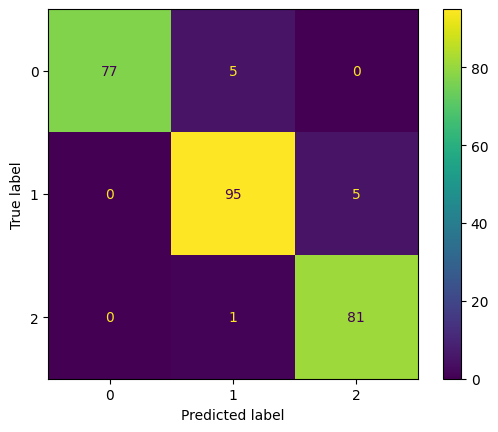

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

labels = [0,1,2]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

#Dataset de Doenças Cardíacas

Neste exemplo vamos carregar o dataset que determina características de pessoas saudáveis e cardiácas. Também uma análise explorátoria utilizando a biblioteca [pandas](https://pandas.pydata.org/).

In [35]:
import pandas as pd
#download
!py -m wget https://raw.githubusercontent.com/sharmaroshan/Heart-UCI-Dataset/master/heart.csv

#Carregar o csv
df = pd.read_csv(r'C:\Users\gcampos\OneDrive - JACTO\Área de Trabalho\PUCPR\Tópico 3\heart.csv')

#Detalhamento dos tipos de dados
df.info()

#Shuffle e mostrar os primeiros 30 elementos
df.sample(frac=1).head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


C:\Python\python.exe: No module named wget


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
195,59,1,0,170,326,0,0,140,1,3.4,0,0,3,0
221,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
143,67,0,0,106,223,0,1,142,0,0.3,2,2,2,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
279,61,1,0,138,166,0,0,125,1,3.6,1,1,2,0
46,44,1,2,140,235,0,0,180,0,0.0,2,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
230,47,1,2,108,243,0,1,152,0,0.0,2,0,2,0
199,65,1,0,110,248,0,0,158,0,0.6,2,2,1,0
76,51,1,2,125,245,1,0,166,0,2.4,1,0,2,1


A última coluna determina a classe (0 ou 1), sendo que '0' a classe de uma pessoal saudável e 1 para cardíacos

Abaixo, vamos explorar o dataset. Avalie o balanceamento das features vs classes

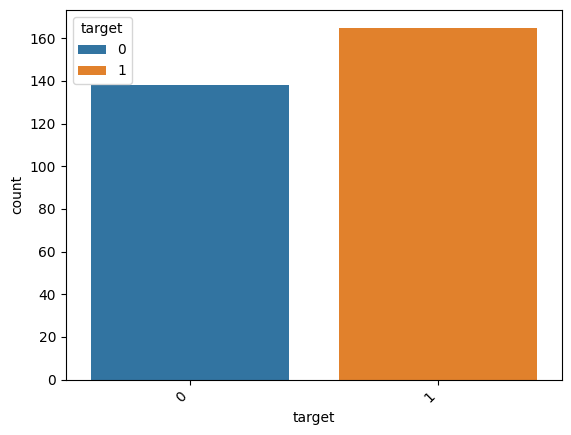

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df,x='target',hue='target')
plt.xticks(rotation=45, ha='right');

##Holdout



In [37]:
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=random_state
)

##Treinamento


In [38]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train);
y_pred = model.predict(X_train)

Com o modelo treinado, podemos prever a base de teste

In [39]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report

y_pred = model.predict(X_test)
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.79      0.80        47
           1       0.81      0.83      0.82        53

    accuracy                           0.81       100
   macro avg       0.81      0.81      0.81       100
weighted avg       0.81      0.81      0.81       100



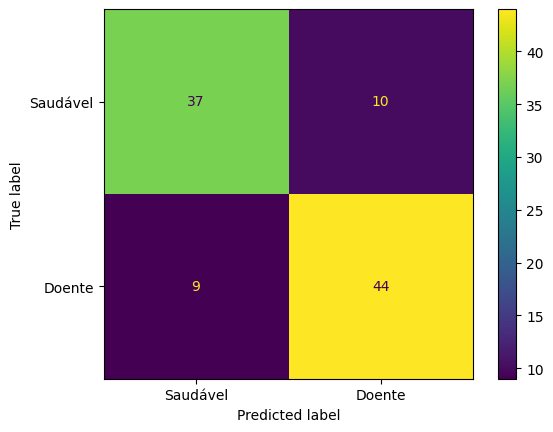

In [40]:
labels = ["Saudável", "Doente"]
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

É importante ilustrar, que também é possivel prever uma única amostra
Neste caso, ilustramos também o uso de vetor numpy

In [41]:
X_test_np = X_test.to_numpy()
y_test_np = y_test.to_numpy()
print(X_test_np.shape)

i=0
amostra_teste  = X_test_np[i]

print("Sample: ", amostra_teste)
print("Target: ", y_test_np[i])
pred = model.predict([amostra_teste])
print("Predicted Class: ", pred)



(100, 13)
Sample:  [ 65.    1.    3.  138.  282.    1.    0.  174.    0.    1.4   1.    1.
   2. ]
Target:  0
Predicted Class:  [1]


c:\Python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


#Dataset de Empréstimo Bancário
Agora vamos treinar um Naive Bayes com um dataset que determina a probabilidade de uma pessoa quitar o seu emprestímo.

A descrição das variavéis é dado como segue:

*credit_policy: 1 se o cliente atender aos critérios de concessão de crédito do LendingClub.com e 0 caso contrário.

*purpose: O objetivo do empréstimo, como por exemplo: cartão de crédito, consolidação de dívidas, etc.

*int_rate: A taxa de juros do empréstimo (proporção).

*installment: As parcelas mensais ($) devidas pelo mutuário se o empréstimo for financiado.

*log_annual_inc: O log natural da renda anual do mutuário.

*dti: A relação dívida-renda do mutuário.

*fico: A pontuação de crédito FICO do mutuário.

*days_with_cr_line: O número de dias que o mutuário tem tido uma linha de crédito.

*revol_bal: O saldo rotativo do mutuário.

*revol_util: A taxa de utilização da linha rotativa do mutuário.

*inq_last_6mths: O número de consultas feitas por credores nos últimos 6 meses pelo mutuário.

*delinq_2yrs: O número de vezes que o mutuário ficou mais de 30 dias inadimplente em um pagamento nos últimos 2 anos.

*pub_rec: O número de registros públicos prejudiciais ao crédito do mutuário.

*not_fully_paid: Indica se o empréstimo não foi pago integralmente (o mutuário inadimpliu ou foi considerado improvável de pagar). Sendo 0 para quem quitou e 1 para quem não quitou

In [44]:
import pandas as pd
#download
!py -m wget https://raw.githubusercontent.com/tirthajyoti/Machine-Learning-with-Python/master/Datasets/loan_data.csv

#Carregar o csv
df = pd.read_csv('C:\Users\gcampos\OneDrive - JACTO\Área de Trabalho\PUCPR\Tópico 3\loan_data.csv')

#Detalhamento dos tipos de dados
df.info()

#Shuffle e mostrar os primeiros 30 elementos
df.sample(frac=1).head(30)

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (3475245262.py, line 6)

Nota-se que apenas o campo 'purpose' é categórico. Dado que o dataset possui dados contínuos (não categóricos), precisamos converter este dado.

Um exemplo geral de converter dados catégoricos em númericos em scikit-learn é dado abaixo. Neste caso, a característica de cor é apresentada.






In [15]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

#Lista de 1-Coluna
features = [['blue'],['red'],['white'],['red']]
print(features)

encoder = OneHotEncoder()
encoder.fit(features)
encoded_features = encoder.transform(features)
print(encoded_features.toarray())

#Múltiplas colunas e apenas 1 categorica
features = [[1.8,'blue',4],
            [2.0,'red',2],
            [1.0,'white',2],
            [1.5,'red',4]]


print(features)

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
features_encoded = np.array(ct.fit_transform(features))
print(features_encoded)


[['blue'], ['red'], ['white'], ['red']]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]
[[1.8, 'blue', 4], [2.0, 'red', 2], [1.0, 'white', 2], [1.5, 'red', 4]]
[[1.0 0.0 0.0 1.8 4]
 [0.0 1.0 0.0 2.0 2]
 [0.0 0.0 1.0 1.0 2]
 [0.0 1.0 0.0 1.5 4]]


De forma similar, podemos utilizar a função 'get_dummies' do pandas. Neste caso, voltamos a nossa base de empréstimo bancário.

In [45]:
df = pd.get_dummies(df,columns=['purpose'],drop_first=True)
df.head()

KeyError: "None of [Index(['purpose'], dtype='object')] are in the [columns]"

##Holdout, Treino e Teste

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      2631
           1       0.35      0.09      0.14       530

    accuracy                           0.82      3161
   macro avg       0.60      0.53      0.52      3161
weighted avg       0.76      0.82      0.77      3161



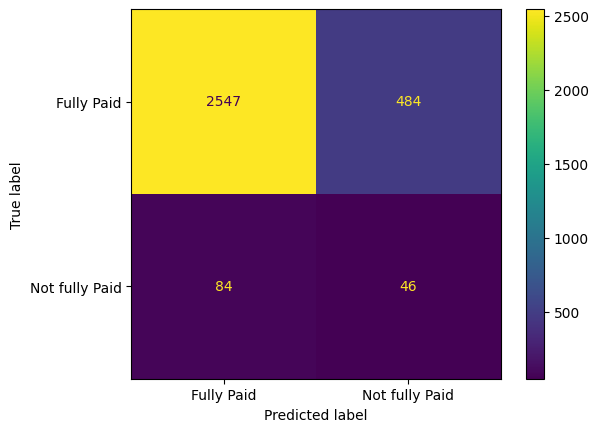

In [17]:
from sklearn.model_selection import train_test_split

X = df.drop('not.fully.paid', axis=1)
y = df['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=random_state
)

from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(X_train, y_train);

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, classification_report

y_pred = model.predict(X_test)

report = classification_report(y_test,y_pred)

print(report)

labels = ["Fully Paid", "Not fully Paid"]
cm = confusion_matrix(y_pred,y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

* O que aconteceu com o modelo acima?

* Porque o modelo tende a classificar as amostras como "Fully paid" ?